___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option("display.width", 1000)
#pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, Normalizer, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, roc_curve,\
                            average_precision_score, precision_recall_curve

In [158]:
pip install scikit-plot

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [159]:
df_male = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr',encoding='latin-1')
df_male

subjectid  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0         10027                             266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1         10032                             233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2         10033                             287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3         10092               

In [160]:
df_female= pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq')
df_female.rename(columns={"SubjectId": "subjectid"}, inplace=True)
df_female

subjectid  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0         10037                             231            1282                    301                 204          1180                      222               177                373                        315               263               466                  65               338                        301                 141                  1011           223            836                587                     476                360             1336           274                 922         245         1095           759                    557                             310          35         65             16              220               713                     91         246                        316                         265                    517                432                 1028           75                182         184          141                548         191                     314           69         345                388                 966   
1         10038                             194            1379                    320                 207          1292                      225               178                372                        272               250               430                  64               294                        270                 126                   893           186            900                583                     483                350             1440           261                 839         206         1234           835                    549                             329          32         60             23              208               726                     91         249                        341                         247                    468                463                 1117           78                187         189          138                535         180                     307           60         315                335                1048   
2         10042                             183            1369                    329                 233          1271                      237               196                397                        300               276               450                  69               309                        270                 128                   987           204            861                583                     466                384             1451           287                 874         223         1226           821                    643                             374          36         65             26              204               790                    100         265                        343                         262                    488                469                 1060           84                198         195          146                588         207                     331           70         356                399                1043   
3         10043               

In [161]:
df = pd.concat([df_female,df_male])
df

subjectid  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0         10037                             231            1282                    301                 204          1180                      222               177                373                        315               263               466                  65               338                        301                 141                  1011           223            836                587                     476                360             1336           274                 922         245         1095           759                    557                             310          35         65             16              220               713                     91         246                        316                         265                    517                432                 1028           75                182         184          141                548         191                     314           69         345                388                 966   
1         10038                             194            1379                    320                 207          1292                      225               178                372                        272               250               430                  64               294                        270                 126                   893           186            900                583                     483                350             1440           261                 839         206         1234           835                    549                             329          32         60             23              208               726                     91         249                        341                         247                    468                463                 1117           78                187         189          138                535         180                     307           60         315                335                1048   
2         10042                             183            1369                    329                 233          1271                      237               196                397                        300               276               450                  69               309                        270                 128                   987           204            861                583                     466                384             1451           287                 874         223         1226           821                    643                             374          36         65             26              204               790                    100         265                        343                         262                    488                469                 1060           84                198         195          146                588         207                     331           70         356                399                1043   
3         10043               

In [162]:
df.shape

(6068, 108)

## Explore Data

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6068 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [164]:
df.describe().T

count          mean           std      min       25%      50%       75%       max
subjectid                       6068.0  20757.198418  13159.390894  10027.0  14841.75  20063.5  27234.50  920103.0
abdominalextensiondepthsitting  6068.0    246.468688     37.400106    155.0    219.00    242.0    271.00     451.0
acromialheight                  6068.0   1406.161338     79.091048   1115.0   1350.00   1410.0   1462.00    1683.0
acromionradialelength           6068.0    327.374423     20.720018    249.0    313.00    328.0    341.25     393.0
anklecircumference              6068.0    224.891397     16.051833    156.0    214.00    225.0    235.00     293.0
axillaheight                    6068.0   1299.608767     72.022286   1038.0   1249.00   1302.0   1349.00    1553.0
balloffootcircumference         6068.0    244.192650     16.845020    186.0    232.00    245.0    256.00     306.0
balloffootlength                6068.0    194.754614     13.516368    151.0    185.00    195.0    204.00     245.0
biacromialbreadth               6068.0    399.204186     30.236914    283.0    376.00    404.0    421.00     489.0
bicepscircumferenceflexed       6068.0    340.934245     41.519866    216.0    311.00    341.0    370.00     490.0
bicristalbreadth                6068.0    274.735003     19.221034    197.0    262.00    274.0    288.00     362.0
bideltoidbreadth                6068.0    490.754450     42.135535    357.0    460.00    492.0    520.00     637.0
bimalleolarbreadth              6068.0     72.252637      5.344590     55.0     68.00     72.0     76.00      91.0
bitragionchinarc                6068.0    324.896506     17.087501    267.0    314.00    326.0    336.00     385.0
bitragionsubmandibulararc       6068.0    306.636124     20.794166    245.0    292.00    307.0    321.00     390.0
bizygomaticbreadth              6068.0    139.723467      7.308457    116.0    135.00    140.0    145.00     174.0
buttockcircumference            6068.0   1020.084707     76.422643    737.0    968.00   1017.0   1068.00    1341.0
buttockdepth                    6068.0    241.619974     26.482986    168.0    222.00    241.0    259.00     349.0
buttockheight                   6068.0    870.152274     54.822574    656.0    832.00    868.0    906.25    1080.0
buttockkneelength               6068.0    608.999176     33.792839    466.0    586.00    609.0    632.00     736.0
buttockpopliteallength          6068.0    497.097561     29.082390    367.0    477.00    497.0    517.00     605.0
calfcircumference               6068.0    386.041200     30.647180    266.0    364.75    385.0    406.00     523.0
cervicaleheight                 6068.0   1477.490442     84.323707   1184.0   1418.00   1484.0   1537.00    1738.0
chestbreadth                    6068.0    282.859097     20.659397    213.0    268.00    283.0    297.00     363.0
chestcircumference              6068.0   1022.098879    100.671751    695.0    949.00   1020.5   1092.00    1469.0
chestdepth                      6068.0    251.738464     26.777843    170.0    233.00    251.0    270.00     383.0
chestheight                     6068.0   1252.013184     79.583972    984.0   1196.00   1259.0   1309.00    1506.0
crotchheight                    6068.0    825.110086     54.748240    610.0    787.00    825.0    863.00    1031.0
crotchlengthomphalion           6068.0    621.851681     45.332961    473.0    590.00    620.0    651.00     799.0
crotchlengthposterioromphalion  6068.0    351.315920     29.944868    243.0    330.00    350.0    372.00     468.0
earbreadth                      6068.0     35.132169      3.231469     25.0     33.00     35.0     37.00      46.0
earlength                       6068.0     62.625906      4.876264     46.0     59.00     62.0     66.00      81.0
earprotrusion                   6068.0     22.263349      3.172715     13.0     20.00     22.0     24.00      34.0
elbowrestheight                 6068.0    240.911338     28.509447    138.0    222.00    241.0    261.00     345.0
eyeheigh

In [165]:
df.duplicated().sum()

0

In [166]:
df.nunique()

subjectid                         6068
abdominalextensiondepthsitting     218
acromialheight                     432
acromionradialelength              133
anklecircumference                 112
axillaheight                       402
balloffootcircumference            107
balloffootlength                    86
biacromialbreadth                  169
bicepscircumferenceflexed          237
bicristalbreadth                   132
bideltoidbreadth                   244
bimalleolarbreadth                  37
bitragionchinarc                   107
bitragionsubmandibulararc          125
bizygomaticbreadth                  50
buttockcircumference               429
buttockdepth                       161
buttockheight                      322
buttockkneelength                  209
buttockpopliteallength             185
calfcircumference                  196
cervicaleheight                    452
chestbreadth                       131
chestcircumference                 521
chestdepth               

In [167]:
df.corr()

subjectid  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  \
subjectid                        1.000000                       -0.074702       -0.056287              -0.037505           -0.070446     -0.055057                -0.071510          0.001430          -0.082150                  -0.070572          0.028671         -0.080712           -0.049426         -0.086444                  -0.053103           -0.054291             -0.015120     -0.069990      -0.022891          -0.031233                0.042649          -0.049184        -0.065412     -0.019509           -0.069493   -0.032708    -0.040080     -0.022426              -0.044245                       -0.188644    0.050830  -0.124125      -0.090568        -0.001614         -0.102278              -0.045490   -0.060872                  -0.096064                   -0.074443              -0.086128          -0.047800            -0.105716    -0.071225          -0.085648   -0.046868    -0.047340          -0.065551   -0.066234               -0.078628    -0.005070   -0.006978          -0.019887   
abdominalextensiondepthsitting  -0.074702                        1.000000        0.360623               0.321755            0.524747      0.290821                 0.459174          0.342050           0.421544                   0.691460          0.506497          0.724471            0.371894          0.529000                   0.621899            0.496898              0.741188      0.841581       0.258496           0.483275                0.333003           0.657287         0.346116      0.631068            0.826382    0.780450     0.304562      0.203336               0.466971                        0.209593    0.247567   0.402031       0.132538         0.256314          0.282460               0.440374    0.354184                   0.356183                    0.629757               0.728564           0.317555             0.423842     0.426221           0.462871    0.311137     0.341047           0.370753    0.342171                0.509410     0.439029    0.597205           0.557642   
acromialheight                  -0.056287                        0.360623        1.000000               0.872475            0.512417      0.987452                 0.693403          0.802922           0.735565                   0.529353          0.409043          0.633088            0.705621          0.569411                   0.581562            0.478282              0.302339      0.355987       0.870776           0.817915                0.755708           0.413845         0.984230      0.549632            0.538292    0.293602     0.960106      0.901554               0.353748                        0.421327    0.365927   0.434054       0.268885         0.282664          0.813120               0.667315    0.830812                   0.849715                    0.640346               0.578186           0.866286             0.895280     0.711809           0.719060    0.758197     0.380922           0.442553    0.560746                0.800841     0.449487    0.227349           0.122086   
acromionradialelength           

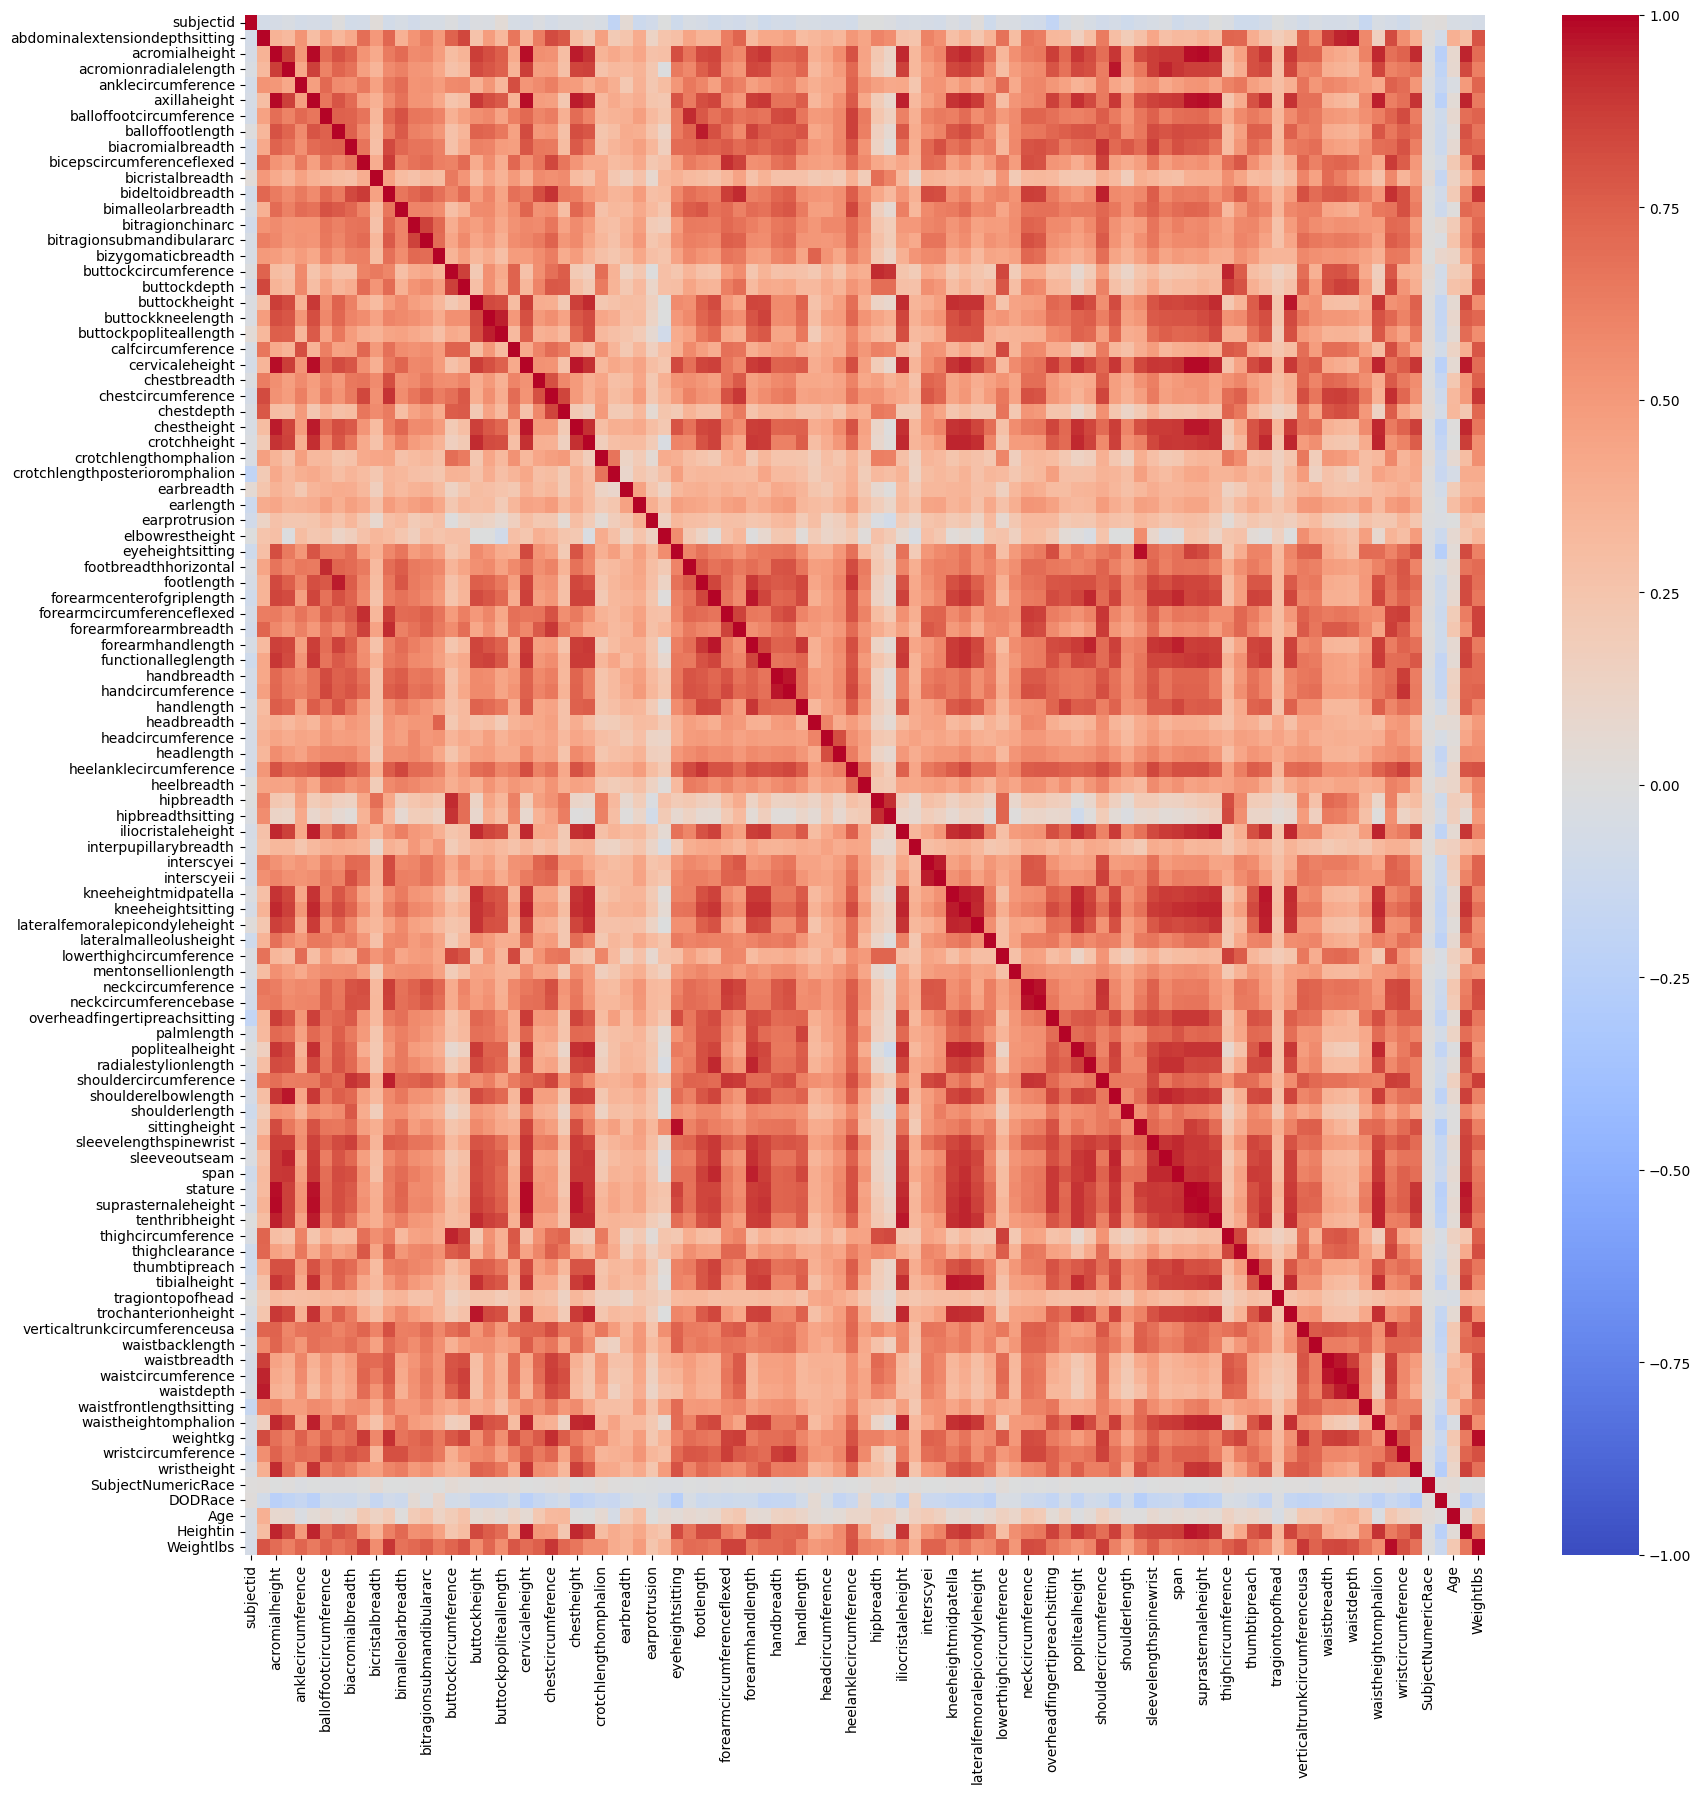

In [168]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="coolwarm");

Drop outliers

In [169]:
def remove_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include='number').columns
    for column in numeric_cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        num_outliers = len(outliers)

        print(f"{column:<30}: {num_outliers} outliers detected")

        # Remove outliers from the DataFrame
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

# Call the function to remove outliers
filtered_df = remove_outliers_iqr(df)

# Print the DataFrame with outliers removed
print("\nDataFrame after removing outliers:")
print(filtered_df)

subjectid                     : 1 outliers detected
abdominalextensiondepthsitting: 46 outliers detected
acromialheight                : 15 outliers detected
acromionradialelength         : 31 outliers detected
anklecircumference            : 70 outliers detected
axillaheight                  : 10 outliers detected
balloffootcircumference       : 6 outliers detected
balloffootlength              : 6 outliers detected
biacromialbreadth             : 0 outliers detected
bicepscircumferenceflexed     : 14 outliers detected
bicristalbreadth              : 58 outliers detected
bideltoidbreadth              : 5 outliers detected
bimalleolarbreadth            : 1 outliers detected
bitragionchinarc              : 39 outliers detected
bitragionsubmandibulararc     : 7 outliers detected
bizygomaticbreadth            : 13 outliers detected
buttockcircumference          : 34 outliers detected
buttockdepth                  : 9 outliers detected
buttockheight                 : 20 outliers detected
b

In [170]:
pd.concat([filtered_df, df])

# Reset the index of the merged DataFrame
df.reset_index(drop=True, inplace=True)

# Display the merged DataFrame
df.head()

subjectid  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0      10037                             231            1282                    301                 204          1180                      222               177                373                        315               263               466                  65               338                        301                 141                  1011           223            836                587                     476                360             1336           274                 922         245         1095           759                    557                             310          35         65             16              220               713                     91         246                        316                         265                    517                432                 1028           75                182         184          141                548         191                     314           69         345                388                 966   
1      10038                             194            1379                    320                 207          1292                      225               178                372                        272               250               430                  64               294                        270                 126                   893           186            900                583                     483                350             1440           261                 839         206         1234           835                    549                             329          32         60             23              208               726                     91         249                        341                         247                    468                463                 1117           78                187         189          138                535         180                     307           60         315                335                1048   
2      10042                             183            1369                    329                 233          1271                      237               196                397                        300               276               450                  69               309                        270                 128                   987           204            861                583                     466                384             1451           287                 874         223         1226           821                    643                             374          36         65             26              204               790                    100         265                        343                         262                    488                469                 1060           84                198         195          146                588         207                     331           70         356                399                1043   
3      10043                           

In [171]:
df.shape

(6068, 108)

Drop class that have less than 500 observation

In [172]:
df.DODRace.value_counts() #Target

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

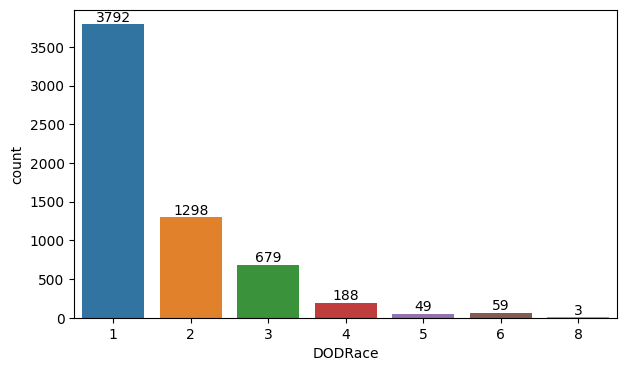

In [173]:
ax = sns.countplot(x='DODRace', data=df)
ax.bar_label(ax.containers[0]);

In [174]:
# Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)
drop_model = df.DODRace.value_counts()[df.DODRace.value_counts() <= 500].index
drop_model

Int64Index([4, 6, 5, 8], dtype='int64')

In [175]:
for i in drop_model:
    drop_index = df[df['DODRace'] == i].index
    df.drop(index = drop_index, inplace=True)

df.reset_index(drop=True, inplace=True) #

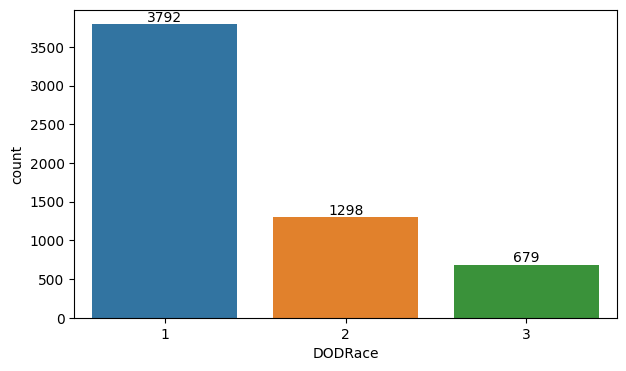

In [176]:
ax = sns.countplot(x='DODRace', data=df)
ax.bar_label(ax.containers[0]);

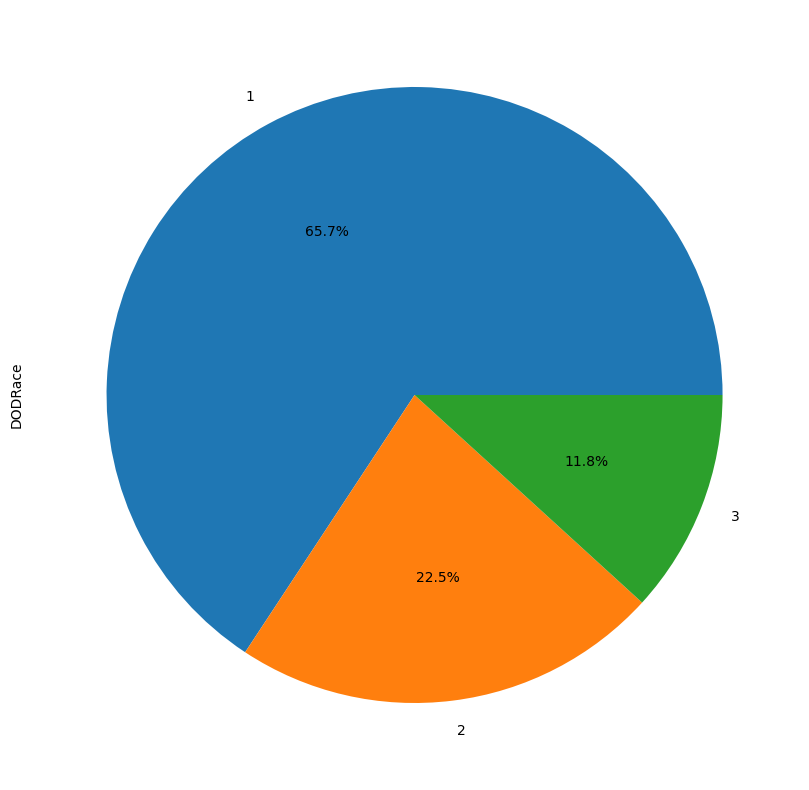

In [177]:
df["DODRace"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

In [178]:
df.head()

subjectid  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0      10037                             231            1282                    301                 204          1180                      222               177                373                        315               263               466                  65               338                        301                 141                  1011           223            836                587                     476                360             1336           274                 922         245         1095           759                    557                             310          35         65             16              220               713                     91         246                        316                         265                    517                432                 1028           75                182         184          141                548         191                     314           69         345                388                 966   
1      10038                             194            1379                    320                 207          1292                      225               178                372                        272               250               430                  64               294                        270                 126                   893           186            900                583                     483                350             1440           261                 839         206         1234           835                    549                             329          32         60             23              208               726                     91         249                        341                         247                    468                463                 1117           78                187         189          138                535         180                     307           60         315                335                1048   
2      10042                             183            1369                    329                 233          1271                      237               196                397                        300               276               450                  69               309                        270                 128                   987           204            861                583                     466                384             1451           287                 874         223         1226           821                    643                             374          36         65             26              204               790                    100         265                        343                         262                    488                469                 1060           84                198         195          146                588         207                     331           70         356                399                1043   
3      10043                           

In [179]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [180]:
df.DODRace.unique()

array([2, 3, 1])

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5769 entries, 0 to 5768
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 4.8+ MB


In [182]:
df.shape

(5769, 108)

In [183]:
df.isnull().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

Drop unuesefull features

Ethnicity have a lot of non values

In [184]:
df


subjectid  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0         10037                             231            1282                    301                 204          1180                      222               177                373                        315               263               466                  65               338                        301                 141                  1011           223            836                587                     476                360             1336           274                 922         245         1095           759                    557                             310          35         65             16              220               713                     91         246                        316                         265                    517                432                 1028           75                182         184          141                548         191                     314           69         345                388                 966   
1         10038                             194            1379                    320                 207          1292                      225               178                372                        272               250               430                  64               294                        270                 126                   893           186            900                583                     483                350             1440           261                 839         206         1234           835                    549                             329          32         60             23              208               726                     91         249                        341                         247                    468                463                 1117           78                187         189          138                535         180                     307           60         315                335                1048   
2         10042                             183            1369                    329                 233          1271                      237               196                397                        300               276               450                  69               309                        270                 128                   987           204            861                583                     466                384             1451           287                 874         223         1226           821                    643                             374          36         65             26              204               790                    100         265                        343                         262                    488                469                 1060           84                198         195          146                588         207                     331           70         356                399                1043   
3         10043               

In [185]:
df.corr()["DODRace"].sort_values(ascending=False)

DODRace                           1.000000
interpupillarybreadth             0.194548
heelbreadth                       0.166804
bitragionchinarc                  0.083263
thighcircumference                0.032906
bizygomaticbreadth                0.032559
subjectid                         0.028524
SubjectNumericRace                0.019567
Age                               0.013222
headcircumference                 0.009739
palmlength                        0.001644
thighclearance                   -0.000570
buttockdepth                     -0.001344
lowerthighcircumference          -0.003629
headbreadth                      -0.008958
hipbreadthsitting                -0.013892
radialestylionlength             -0.015375
mentonsellionlength              -0.018517
bitragionsubmandibulararc        -0.024195
buttockcircumference             -0.025066
chestdepth                       -0.026500
handlength                       -0.026917
waistdepth                       -0.031391
bicepscircu

In [186]:
df.shape

(5769, 108)

- Drop (Ethnicity) column because it have too many missing value
- Drop (Date, SubjectId, Weightlbs,Installation, PrimaryMOS, Heightin) columns because it does not have a strong effect on data
- Drop (SubjectNumericRace) column because it seems like DODRace

In [187]:

droped_data = [ "Date", "subjectid", "Weightlbs","Installation", "SubjectNumericRace", "PrimaryMOS", "Heightin", "Ethnicity"]

df.drop(droped_data , axis=1 , inplace=True)


In [188]:
df.shape

(5769, 100)

In [189]:
df.head(2)

abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0                             231            1282                    301                 204          1180                      222               177                373                        315               263               466                  65               338                        301                 141                  1011           223            836                587                     476                360             1336           274                 922         245         1095           759                    557                             310          35         65             16              220               713                     91         246                        316                         265                    517                432                 1028           75                182         184          141                548         191                     314           69         345                388                 966   
1                             194            1379                    320                 207          1292                      225               178                372                        272               250               430                  64               294                        270                 126                   893           186            900                583                     483                350             1440           261                 839         206         1234           835                    549                             329          32         60             23              208               726                     91         249                        341                         247                    468                463                 1117           78                187         189          138                535         180                     307           60         315                335                1048   

   interpupillarybreadth  interscyei  interscyeii  kneeheightmidpatella  kneeheightsitting  lateralfemoralepicondyleheight  lateralmalleolusheight  lowerthighcircumference  mentonsellionlength  neckcircumference  neckcircumferencebase  overheadfingertipreachsitting  palmlength  poplitealheight  radialestylionlength  shouldercircumference  shoulderelbowlength  shoulderlength  sittingheight  sleevelengthspinewrist  sleeveoutseam  span  stature  suprasternaleheight  tenthribheight  thighcircumference  thighclearance  thumbtipreach  tibialheight  tragiontopofhead  trochanterionheight  verticaltrunkcircumferenceusa  waistbacklength  waistbreadth  waistcircumference  waistdepth  waistfrontlengthsitting  waistheightomphalion  weightkg  wristcircumference  wristheight  Gender     Component                  Branch SubjectsBirthLocation  DODRace  Age WritingPreference  
0                    645         363          399                   435                496                             447                      55                      404                  

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5769 entries, 0 to 5768
Data columns (total 100 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  5769 non-null   int64 
 1   acromialheight                  5769 non-null   int64 
 2   acromionradialelength           5769 non-null   int64 
 3   anklecircumference              5769 non-null   int64 
 4   axillaheight                    5769 non-null   int64 
 5   balloffootcircumference         5769 non-null   int64 
 6   balloffootlength                5769 non-null   int64 
 7   biacromialbreadth               5769 non-null   int64 
 8   bicepscircumferenceflexed       5769 non-null   int64 
 9   bicristalbreadth                5769 non-null   int64 
 10  bideltoidbreadth                5769 non-null   int64 
 11  bimalleolarbreadth              5769 non-null   int64 
 12  bitragionchinarc                5769 non-null  

In [191]:
for col in df:
    print(f"{col:<30}:", df[col].nunique())

abdominalextensiondepthsitting: 218
acromialheight                : 425
acromionradialelength         : 129
anklecircumference            : 110
axillaheight                  : 396
balloffootcircumference       : 107
balloffootlength              : 84
biacromialbreadth             : 167
bicepscircumferenceflexed     : 236
bicristalbreadth              : 132
bideltoidbreadth              : 239
bimalleolarbreadth            : 37
bitragionchinarc              : 107
bitragionsubmandibulararc     : 124
bizygomaticbreadth            : 48
buttockcircumference          : 426
buttockdepth                  : 159
buttockheight                 : 315
buttockkneelength             : 204
buttockpopliteallength        : 176
calfcircumference             : 195
cervicaleheight               : 445
chestbreadth                  : 131
chestcircumference            : 520
chestdepth                    : 160
chestheight                   : 415
crotchheight                  : 308
crotchlengthomphalion         :

In [192]:
numeric_columns = df.select_dtypes(include=['object']).columns
for i in numeric_columns:
    print(f"{i:<30}:",df[i].nunique())

Gender                        : 2
Component                     : 3
Branch                        : 3
SubjectsBirthLocation         : 136
WritingPreference             : 3


- SubjectsBirthLocation has a huge number of unique value so I minmize them by group them

SubjectsBirthLocation to numeric data

In [193]:
df.SubjectsBirthLocation.value_counts()

California                417
New York                  411
Texas                     386
Indiana                   264
Illinois                  210
Florida                   210
Oklahoma                  205
Michigan                  194
Minnesota                 194
Mississippi               193
Georgia                   168
Alabama                   164
South Carolina            161
North Carolina            145
Ohio                      139
Louisiana                 136
Pennsylvania              130
Virginia                  113
Massachusetts             109
Wisconsin                  99
Germany                    90
Puerto Rico                88
New Jersey                 88
Missouri                   83
Maryland                   78
Colorado                   78
Arizona                    75
Tennessee                  74
Kentucky                   67
Kansas                     62
Washington                 61
Iowa                       55
South Dakota               53
Arkansas  

In [194]:
location_group = df.SubjectsBirthLocation.value_counts()[df.SubjectsBirthLocation.value_counts() <= 50].index
location_group

Index(['Oregon', 'Mexico', 'Connecticut', 'Jamaica', 'Nebraska', 'Utah', 'West Virginia', 'Nevada', 'Idaho', 'District of Columbia',
       ...
       'Bulgaria', 'British Virgin Islands', 'Sri Lanka', 'Azerbaijan', 'Venezuela', 'Bosnia and Herzegovina', 'Bermuda', 'Denmark', 'South Korea', 'Guatemala'], dtype='object', length=102)

In [195]:
dic = {
    "country" : location_group,
    "values" : df.SubjectsBirthLocation.value_counts()[location_group]
}
pd.DataFrame(dic)

country  values
Oregon                                  Oregon      40
Mexico                                  Mexico      39
Connecticut                        Connecticut      36
Jamaica                                Jamaica      35
Nebraska                              Nebraska      30
Utah                                      Utah      27
West Virginia                    West Virginia      26
Nevada                                  Nevada      21
Idaho                                    Idaho      20
District of Columbia      District of Columbia      19
Hawaii                                  Hawaii      18
North Dakota                      North Dakota      18
Maine                                    Maine      18
Rhode Island                      Rhode Island      18
Dominican Republic          Dominican Republic      17
Delaware                              Delaware      17
New Mexico                          New Mexico      16
New Hampshire                    New Hampshire      14
Colombia                              Colombia      13
Vermont                                Vermont      13
Haiti                                    Haiti      12
Montana                                Montana      12
United Kingdom                  United Kingdom      11
Panama                                  Panama      10
Canada                                  Canada       8
Peru                                      Peru       8
Guyana                                  Guyana       8
Russia                                  Russia       8
US Virgin Islands            US Virgin Islands       7
Wyoming                                Wyoming       7
Alaska                                  Alaska       7
Japan                                    Japan       7
Trinidad and Tobago        Trinidad and Tobago       7
Ukraine                                Ukraine       7
Liberia                                Liberia       6
Ecuador                                Ecuador       5
Barbados                              Barbados       5
Poland                                  Poland       5
El Salvador                        El Salvador       5
Philippines                        Philippines       5
Honduras                              Honduras       4
Grenada                                Grenada       4
Nicaragua                            Nicaragua       4
South Africa                      South Africa       4
Cuba                                      Cuba       4
Nigeria                                Nigeria       4
Portugal                              Portugal       4
Romania                                Romania       3
Guam                                      Guam       3
Belgium                                Belgium       3
France                                  France       3
Kenya                                    Kenya       3
Morocco                                Morocco       3
Israel                                  Israel       3
United States                    United States       2
Ghana                                    Ghana       2
Turkey                                  Turkey       2
Sudan                                    Sudan       2
Netherlands                        Netherlands       2
Belize                                  Belize       2
Italy                                    Italy       2
Sierra Leone                      Sierra Leone       2
Lebanon                                Lebanon       2
Antigua and Barbuda        Antigua and Barbuda       2
Iraq                                      Iraq       2
Bolivia                                Bolivia       2
Costa Rica                          Costa Rica       2
Cameroon                              Cameroon       2
Senegal                                Senegal       1
South America                    South America       1
Guadalupe                            Guadalupe       1
Syria                                    Syria       1
Brazil                  

In [196]:
df['SubjectsBirthLocation'] = df['SubjectsBirthLocation'].replace(location_group,'other')

In [197]:
df.SubjectsBirthLocation.value_counts()

other             716
California        417
New York          411
Texas             386
Indiana           264
Florida           210
Illinois          210
Oklahoma          205
Michigan          194
Minnesota         194
Mississippi       193
Georgia           168
Alabama           164
South Carolina    161
North Carolina    145
Ohio              139
Louisiana         136
Pennsylvania      130
Virginia          113
Massachusetts     109
Wisconsin          99
Germany            90
Puerto Rico        88
New Jersey         88
Missouri           83
Maryland           78
Colorado           78
Arizona            75
Tennessee          74
Kentucky           67
Kansas             62
Washington         61
Iowa               55
South Dakota       53
Arkansas           53
Name: SubjectsBirthLocation, dtype: int64

In [198]:
df.isnull().sum()

abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
axillaheight                      0
balloffootcircumference           0
balloffootlength                  0
biacromialbreadth                 0
bicepscircumferenceflexed         0
bicristalbreadth                  0
bideltoidbreadth                  0
bimalleolarbreadth                0
bitragionchinarc                  0
bitragionsubmandibulararc         0
bizygomaticbreadth                0
buttockcircumference              0
buttockdepth                      0
buttockheight                     0
buttockkneelength                 0
buttockpopliteallength            0
calfcircumference                 0
cervicaleheight                   0
chestbreadth                      0
chestcircumference                0
chestdepth                        0
chestheight                       0
crotchheight                      0
crotchlengthomphalion       

interactive(children=(Dropdown(description='model', options=('abdominalextensiondepthsitting', 'acromialheight…

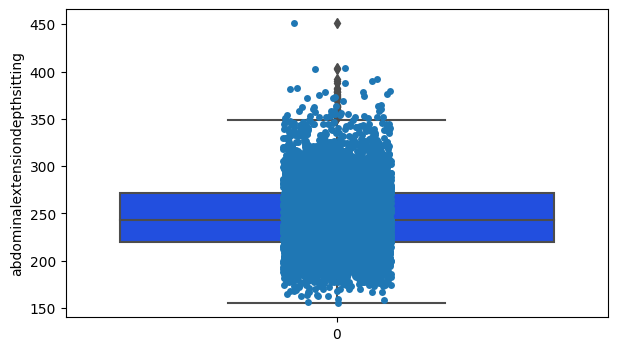

In [199]:
from ipywidgets import interact
i=0
def box_strip(model):
    sns.boxplot(data = df.iloc[:, i],
                palette='bright')

    sns.stripplot(data = df.iloc[:, i])
model = df
interact(box_strip, model=model);

In [200]:
df.shape

(5769, 100)

In [201]:
df["SubjectsBirthLocation"].nunique()

35

In [202]:
numeric_columns = df.select_dtypes(include=['object']).columns
for i in numeric_columns:
    print(f"{i:<30}:",df[i].nunique())

Gender                        : 2
Component                     : 3
Branch                        : 3
SubjectsBirthLocation         : 35
WritingPreference             : 3


Encoding:
- Onhot encoder for all data object

In [203]:
for i in numeric_columns:
    if (df[i].unique().size):
        print(i+": " ,df[i].unique(), "\nsize is: ", df[i].unique().size)
        print("\n")

Gender:  ['Female' 'Male'] 
size is:  2


Component:  ['Regular Army' 'Army National Guard' 'Army Reserve'] 
size is:  3


Branch:  ['Combat Support' 'Combat Service Support' 'Combat Arms'] 
size is:  3


SubjectsBirthLocation:  ['Germany' 'California' 'Texas' 'other' 'Virginia' 'Massachusetts'
 'Michigan' 'Colorado' 'South Dakota' 'Louisiana' 'Ohio' 'South Carolina'
 'Mississippi' 'Illinois' 'New York' 'Iowa' 'Florida' 'Oklahoma'
 'Pennsylvania' 'North Carolina' 'Alabama' 'Wisconsin' 'Arizona'
 'Washington' 'Kentucky' 'Tennessee' 'Kansas' 'Georgia' 'Indiana'
 'Puerto Rico' 'Maryland' 'New Jersey' 'Missouri' 'Minnesota' 'Arkansas'] 
size is:  35


WritingPreference:  ['Right hand' 'Left hand' 'Either hand (No preference)'] 
size is:  3




# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [204]:
target = 'DODRace'
X =df.drop('DODRace',axis=1)
y = df[target]
print('''
Shape of X is  : {}
Shape of Y is  : {}
Shape of df is : {}'''.format(X.shape,y.shape,df.shape))


Shape of X is  : (5769, 99)
Shape of Y is  : (5769,)
Shape of df is : (5769, 100)


In [205]:
X_train ,X_test, y_train , y_test = train_test_split(X,y,test_size=0.20 , random_state=42,stratify =y)

In [206]:
X_test.shape

(1154, 99)

In [207]:
cat = X_train.select_dtypes("object").columns
cat

Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [208]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [209]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()

## 1. Logistic model

### Vanilla Logistic Model

In [ ]:
from sklearn.compose import make_column_transformer

In [ ]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=scaler,
    verbose=False,
)

In [ ]:
operations = [("column_transformer", column_trans ), ("scaler", scaler),
              ("logistic", LogisticRegression(C = 10, penalty = 'l2', solver = 'liblinear'))]

In [ ]:
pipe_model_logistic = Pipeline(steps=operations)

pipe_model_logistic.fit(X_train, y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('scaler', MinMaxScaler()),
                ('logistic', LogisticRegression(C=10, solver='liblinear'))])

In [ ]:
eval_metric(pipe_model_logistic, X_train, y_train, X_test, y_test)

Train_Set
[[2946   30   58]
 [  59  970    9]
 [ 231   39  273]]
              precision    recall  f1-score   support

           1       0.91      0.97      0.94      3034
           2       0.93      0.93      0.93      1038
           3       0.80      0.50      0.62       543

    accuracy                           0.91      4615
   macro avg       0.88      0.80      0.83      4615
weighted avg       0.90      0.91      0.90      4615

Test_Set
[[733   9  16]
 [ 21 237   2]
 [ 60  13  63]]
              precision    recall  f1-score   support

           1       0.90      0.97      0.93       758
           2       0.92      0.91      0.91       260
           3       0.78      0.46      0.58       136

    accuracy                           0.90      1154
   macro avg       0.86      0.78      0.81      1154
weighted avg       0.89      0.90      0.89      1154




In [ ]:
scores = cross_validate(pipe_model_logistic,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision_weighted','recall_weighted','f1_weighted'],
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy               0.895346
train_accuracy              0.908487
test_precision_weighted     0.890290
train_precision_weighted    0.903936
test_recall_weighted        0.895346
train_recall_weighted       0.908487
test_f1_weighted            0.887514
train_f1_weighted           0.901693
dtype: float64

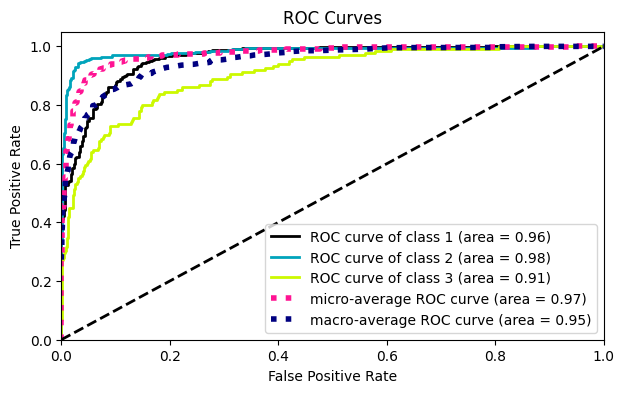

In [ ]:
from scikitplot.metrics import plot_roc, precision_recall_curve

y_pred_probe = pipe_model_logistic.predict_proba(X_test)

plot_roc(y_test, y_pred_probe)
plt.show();

# Conclution

### Logistic Model GridsearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
penalty = ["l1", "l2"]
C = [0.5, 1]
class_weight= ["balanced", None]
param_grid_lo = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__class_weight":class_weight}

In [ ]:
operations = [("column_transformer", column_trans ),("scaler", scaler),
              ("logistic", LogisticRegression(C = 10, penalty = 'l2', solver = 'liblinear'))]

pipe_model_logisticgr = Pipeline(steps=operations)

In [ ]:
grid_model_logisticG = GridSearchCV(pipe_model_logisticgr,
                          param_grid_lo,
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

In [ ]:
grid_model_logisticG.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('column_transformer',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('scaler', MinMaxScaler()),
                                       ('logistic',
                                        LogisticRegression(C=10,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.5, 1],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2']},
             return_train_score=True)

In [ ]:
#The best parameters
grid_model_logisticG.best_params_

{'logistic__C': 1, 'logistic__class_weight': None, 'logistic__penalty': 'l1'}

In [ ]:
pd.DataFrame(grid_model_logisticG.cv_results_).loc[grid_model_logisticG.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score      0.89058
mean_train_score    0.902251
Name: 6, dtype: object

In [ ]:
eval_metric(grid_model_logisticG, X_train, y_train, X_test, y_test)

Train_Set
[[2951   32   51]
 [  70  957   11]
 [ 243   40  260]]
              precision    recall  f1-score   support

           1       0.90      0.97      0.94      3034
           2       0.93      0.92      0.93      1038
           3       0.81      0.48      0.60       543

    accuracy                           0.90      4615
   macro avg       0.88      0.79      0.82      4615
weighted avg       0.90      0.90      0.90      4615

Test_Set
[[739   6  13]
 [ 21 237   2]
 [ 61  15  60]]
              precision    recall  f1-score   support

           1       0.90      0.97      0.94       758
           2       0.92      0.91      0.92       260
           3       0.80      0.44      0.57       136

    accuracy                           0.90      1154
   macro avg       0.87      0.78      0.81      1154
weighted avg       0.89      0.90      0.89      1154




In [ ]:
scores = cross_validate(pipe_model_logisticgr,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision_weighted','recall_weighted','f1_weighted'],
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy               0.895346
train_accuracy              0.908487
test_precision_weighted     0.890290
train_precision_weighted    0.903936
test_recall_weighted        0.895346
train_recall_weighted       0.908487
test_f1_weighted            0.887514
train_f1_weighted           0.901693
dtype: float64

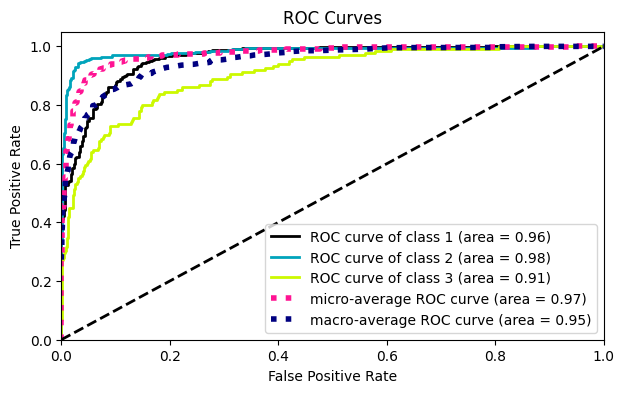

In [ ]:
y_pred_proba = pipe_model_logistic.predict_proba(X_test)
plot_roc(y_test, y_pred_proba)
plt.show();

**The best parameters are :**
    New one or better one
   {'logistic__C': 1, 'logistic__class_weight': None, 'logistic__penalty': 'l1'}

## 2. SVC

### Vanilla SVC model

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

In [ ]:
operations_SVC = [("column_transformer", column_trans ),("scaler", scaler),
                  ("SVC", SVC(probability=True, random_state=101))]

pipe_model_SVC = Pipeline(steps=operations_SVC)

In [ ]:
pipe_model_SVC.fit(X_train, y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('scaler', MinMaxScaler()),
                ('SVC', SVC(probability=True, random_state=101))])

In [ ]:
eval_metric(pipe_model_SVC, X_train, y_train, X_test, y_test)

Train_Set
[[3010   16    8]
 [ 103  934    1]
 [ 369   24  150]]
              precision    recall  f1-score   support

           1       0.86      0.99      0.92      3034
           2       0.96      0.90      0.93      1038
           3       0.94      0.28      0.43       543

    accuracy                           0.89      4615
   macro avg       0.92      0.72      0.76      4615
weighted avg       0.89      0.89      0.87      4615

Test_Set
[[753   4   1]
 [ 29 230   1]
 [ 96  11  29]]
              precision    recall  f1-score   support

           1       0.86      0.99      0.92       758
           2       0.94      0.88      0.91       260
           3       0.94      0.21      0.35       136

    accuracy                           0.88      1154
   macro avg       0.91      0.70      0.73      1154
weighted avg       0.89      0.88      0.85      1154




In [ ]:
scores = cross_validate(pipe_model_SVC,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision_weighted','recall_weighted','f1_weighted'],
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy               0.871722
train_accuracy              0.885735
test_precision_weighted     0.880068
train_precision_weighted    0.893898
test_recall_weighted        0.871722
train_recall_weighted       0.885735
test_f1_weighted            0.847336
train_f1_weighted           0.864402
dtype: float64

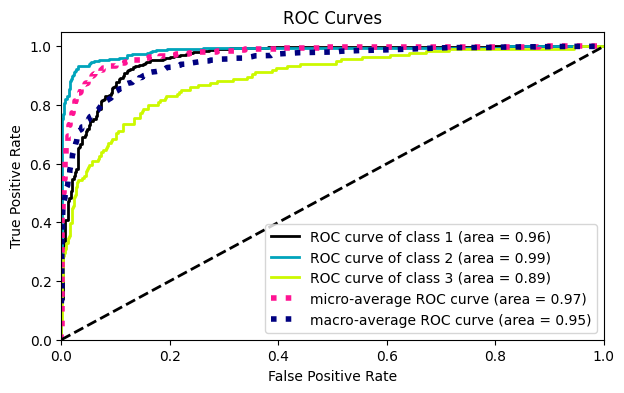

In [ ]:
y_pred_proba = pipe_model_SVC.predict_proba(X_test)
plot_roc(y_test, y_pred_proba)
plt.show();

###  SVC Model GridsearchCV

In [ ]:
param_grid_SVC = {'SVC__C': [0.5, 1],
              'SVC__gamma': ["scale", "auto", 0.1],
              'SVC__kernel': ['rbf', 'linear'],
              'SVC__class_weight': ["balanced", None]}

In [ ]:
operations = [("column_transformer", column_trans ),("scaler", scaler), ("SVC", SVC(probability=True, random_state=101))]

pipe_model_SVCG = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model_SVCG,
                              param_grid= param_grid_SVC,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

In [ ]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('column_transformer',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('scaler', MinMaxScaler()),
                                       ('SVC',
                                        SVC(probability=True,
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.5, 1],
                         'SVC__class_weight': ['balanced', None],
                         'SVC__gamma': ['scale', 'auto', 0.1],
                         'SVC__kernel': ['rbf', 'linear']},
             return_train_score=True)

In [ ]:
svm_model_grid.best_params_

{'SVC__C': 1,
 'SVC__class_weight': None,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'linear'}

In [ ]:
pd.DataFrame(svm_model_grid.cv_results_).loc[svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.893609
mean_train_score    0.906079
Name: 19, dtype: object

In [ ]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Train_Set
[[2952   30   52]
 [  70  951   17]
 [ 240   29  274]]
              precision    recall  f1-score   support

           1       0.90      0.97      0.94      3034
           2       0.94      0.92      0.93      1038
           3       0.80      0.50      0.62       543

    accuracy                           0.91      4615
   macro avg       0.88      0.80      0.83      4615
weighted avg       0.90      0.91      0.90      4615

Test_Set
[[737   5  16]
 [ 21 236   3]
 [ 61  10  65]]
              precision    recall  f1-score   support

           1       0.90      0.97      0.93       758
           2       0.94      0.91      0.92       260
           3       0.77      0.48      0.59       136

    accuracy                           0.90      1154
   macro avg       0.87      0.79      0.82      1154
weighted avg       0.89      0.90      0.89      1154




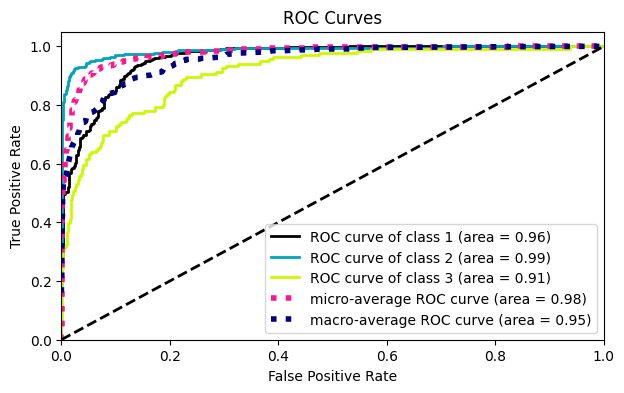

In [ ]:
y_pred_proba = svm_model_grid.predict_proba(X_test)
plot_roc(y_test, y_pred_proba)
plt.show();

**The best parameters are :**
    New one or better one
   {'SVC__C': 1,
 'SVC__class_weight': None,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'linear'}

## 3. RF

### Vanilla RF Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
operations_rf = [("OrdinalEncoder", column_trans), ("scaler", scaler),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('scaler', MinMaxScaler()),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [ ]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      1038
           3       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615

Test_Set
[[755   3   0]
 [ 74 186   0]
 [116  11   9]]
              precision    recall  f1-score   support

           1       0.80      1.00      0.89       758
           2       0.93      0.72      0.81       260
           3       1.00      0.07      0.12       136

    accuracy                           0.82      1154
   macro avg       0.91      0.59      0.61      1154
weighted avg       0.85      0.82      0.78      1154




In [ ]:
scores = cross_validate(pipe_model_rf,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision_weighted','recall_weighted','f1_weighted'],
                        cv =5,
                        n_jobs=-1,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_accuracy               0.803467
train_accuracy              1.000000
test_precision_weighted     0.817489
train_precision_weighted    1.000000
test_recall_weighted        0.803467
train_recall_weighted       1.000000
test_f1_weighted            0.756502
train_f1_weighted           1.000000
dtype: float64

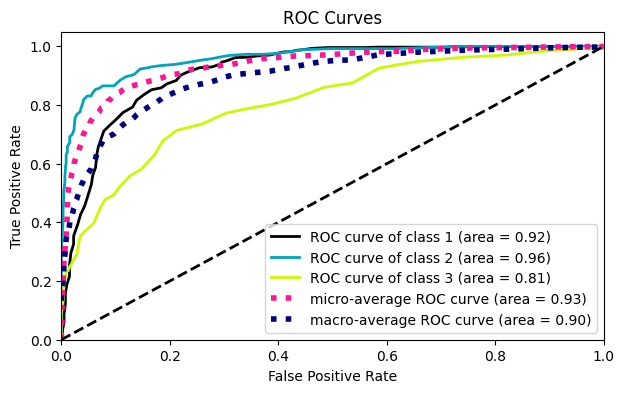

In [ ]:
y_pred_probe = pipe_model_rf.predict_proba(X_test)

plot_roc(y_test, y_pred_probe)
plt.show();

### RF Model GridsearchCV

In [ ]:
param_grid = {"RF_model__n_estimators": [400, 500],
              "RF_model__max_depth": [2, 3]} # add 1

In [ ]:
operations_rfG = [("OrdinalEncoder", column_trans), ("scaler", scaler),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),]

model_RFG = Pipeline(steps=operations_rfG)
rf_grid_model = GridSearchCV(
    model_RFG,
    param_grid,
    refit='f1_weighted',
    scoring=['accuracy', 'precision_weighted','recall_weighted','f1_weighted'],
    n_jobs=-1,
    return_train_score=True)

In [ ]:
rf_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('scaler', MinMaxScaler()),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__n_estimators': [400, 500]},
             refit='f1_weighted', return_train_score=True,
             scoring=['accuracy', 'precision_weighted', 'recall_weighted',
                      'f1_weighted'])

In [ ]:
rf_grid_model.best_params_

{'RF_model__max_depth': 3, 'RF_model__n_estimators': 400}

In [ ]:
rf_grid_model.best_score_

0.6273808844367055

In [ ]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Train_Set
[[1631  283 1120]
 [  74  799  165]
 [ 120   44  379]]
              precision    recall  f1-score   support

           1       0.89      0.54      0.67      3034
           2       0.71      0.77      0.74      1038
           3       0.23      0.70      0.34       543

    accuracy                           0.61      4615
   macro avg       0.61      0.67      0.58      4615
weighted avg       0.77      0.61      0.65      4615

Test_Set
[[428  69 261]
 [ 20 192  48]
 [ 31  14  91]]
              precision    recall  f1-score   support

           1       0.89      0.56      0.69       758
           2       0.70      0.74      0.72       260
           3       0.23      0.67      0.34       136

    accuracy                           0.62      1154
   macro avg       0.61      0.66      0.58      1154
weighted avg       0.77      0.62      0.66      1154




In [ ]:
scores = cross_validate(rf_grid_model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision_weighted','recall_weighted','f1_weighted'],
                        cv =5,
                        n_jobs=-1,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_accuracy               0.585915
train_accuracy              0.605580
test_precision_weighted     0.757105
train_precision_weighted    0.775874
test_recall_weighted        0.585915
train_recall_weighted       0.605580
test_f1_weighted            0.627381
train_f1_weighted           0.645782
dtype: float64

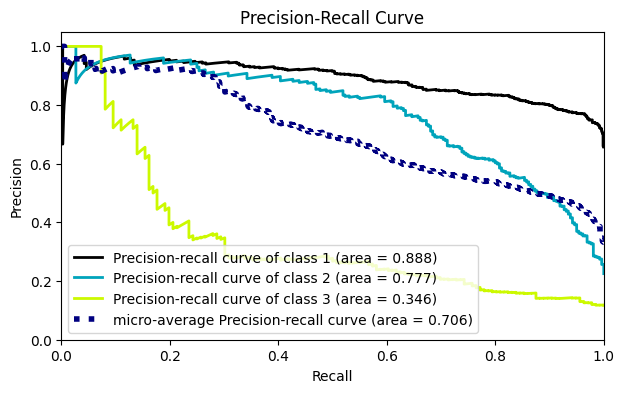

In [ ]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    (
        "RF_model",
        RandomForestClassifier(
            class_weight="balanced", max_depth=3, n_estimators=400, random_state=101
        ),
    ),
]

model = Pipeline(steps=operations_rf)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

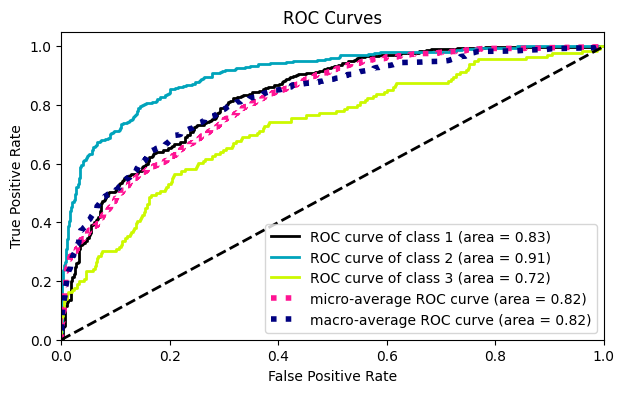

In [ ]:
y_pred_probe = rf_grid_model.predict_proba(X_test)

plot_roc(y_test, y_pred_probe)
plt.show();

**The best parameters are :**
    New one or better one
  {'RF_model__max_depth': 3, 'RF_model__n_estimators': 400}

## 4. XGBoost

### Vanilla XGBoost Model

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [ ]:
#To solve this error (Invalid classes inferred from unique values of y.  Expected: [0 1 2], got [1 2 3])
#That happens because the class column has to start from 0 (as required since version 1.3.2). An easy way to solve that is using LabelEncoder from sklearn.preprocssing library.

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)

#y_train_xgb = y_train.map({"1": 0, "2": 1, "3": 2})

# !pip install xgboost==0.90

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 MB 2.0 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.0
    Uninstalling xgboost-2.0.0:
      Successfully uninstalled xgboost-2.0.0


In [ ]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

pipe_model_xgb = Pipeline(steps=operations_xgb)
# # sorting will be same as classification_report.
y_train_xgb = y_train.map({ 1: 0, 2 : 1, 3: 2})
y_test_xgb = y_test.map({ 1: 0, 2: 1, 3: 2})
# # If the target is not numeric in xgb 1.6 and higher versions, it returns an error.
# # That's why we do the conversion manually.


pipe_model_xgb.fit(X_train, y_train_xgb)


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [ ]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615

Test_Set
[[737  11  10]
 [ 32 224   4]
 [ 74  13  49]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       758
           1       0.90      0.86      0.88       260
           2       0.78      0.36      0.49       136

    accuracy                           0.88      1154
   macro avg       0.85      0.73      0.77      1154
weighted avg       0.87      0.88      0.86      1154




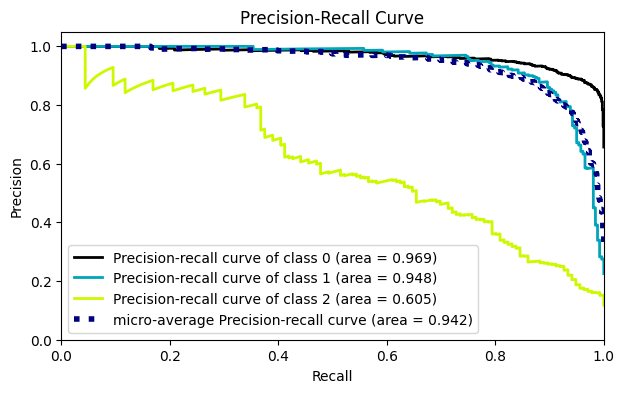

In [ ]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]


model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train_xgb)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test_xgb, y_pred_proba)
plt.show();

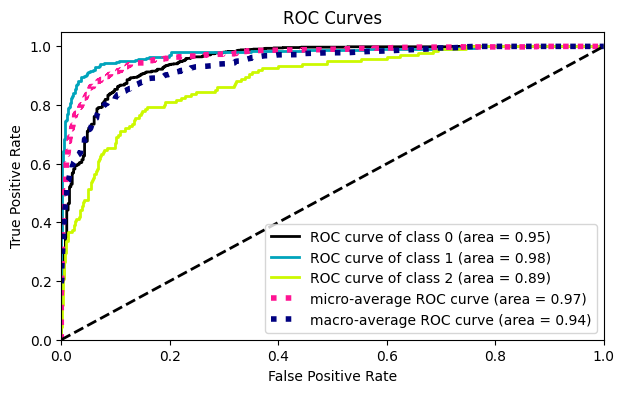

In [ ]:
y_pred_probe = pipe_model_xgb.predict_proba(X_test)

plot_roc(y_test_xgb, y_pred_probe)
plt.show();

### XGBoost Model GridsearchCV

In [ ]:
param_grid = {
    "XGB_model__n_estimators": [20, 40],
    "XGB_model__max_depth": [1, 2],
    "XGB_model__learning_rate": [0.03, 0.05],
    "XGB_model__subsample": [0.8, 1],
    "XGB_model__colsample_bytree": [0.8, 1],
}

In [ ]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(
    model,
    param_grid,
    scoring=make_scorer(recall_score, average=None, labels=[2]),
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)


In [ ]:
xgb_grid_model.fit(X_train, y_train_xgb)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      call...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.03, 0.05],
                         'XGB_model__max_depth': [1, 2],
                         'XGB_model__n_estimators': [20, 40],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[2]))

In [ ]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 40,
 'XGB_model__subsample': 1}

In [ ]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=40, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [ ]:
eval_metric(xgb_grid_model, X_train, y_train_xgb, X_test, y_test_xgb)

Train_Set
[[2994   38    2]
 [ 482  556    0]
 [ 425   43   75]]
              precision    recall  f1-score   support

           0       0.77      0.99      0.86      3034
           1       0.87      0.54      0.66      1038
           2       0.97      0.14      0.24       543

    accuracy                           0.79      4615
   macro avg       0.87      0.55      0.59      4615
weighted avg       0.82      0.79      0.75      4615

Test_Set
[[750   7   1]
 [124 136   0]
 [111  12  13]]
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       758
           1       0.88      0.52      0.66       260
           2       0.93      0.10      0.17       136

    accuracy                           0.78      1154
   macro avg       0.86      0.54      0.56      1154
weighted avg       0.81      0.78      0.73      1154




In [ ]:
scores = cross_validate(xgb_grid_model,
                        X_train,
                        y_train_xgb,
                        scoring=['accuracy', 'precision_weighted','recall_weighted','f1_weighted'],
                        cv =5,
                        n_jobs=-1,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_accuracy               0.763164
train_accuracy              0.772427
test_precision_weighted     0.790781
train_precision_weighted    0.801612
test_recall_weighted        0.763164
train_recall_weighted       0.772427
test_f1_weighted            0.718129
train_f1_weighted           0.729394
dtype: float64

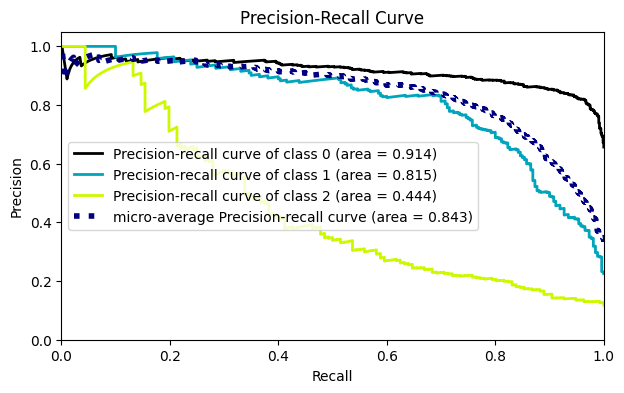

In [ ]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(learning_rate=0.05, max_depth=2, n_estimators=40,
              objective='multi:softprob', random_state=101, subsample=0.8)),
]


model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train_xgb)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test_xgb, y_pred_proba)
plt.show();

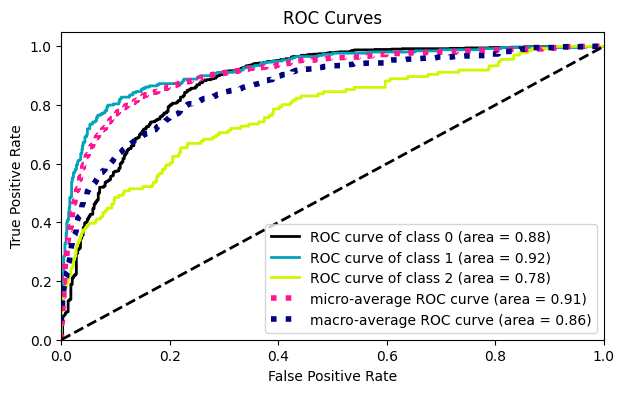

In [ ]:
y_pred_probe = xgb_grid_model.predict_proba(X_test)

plot_roc(y_test_xgb, y_pred_probe)
plt.show();

**The best parameters are :**
    New one or better one
 {'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 40,
 'XGB_model__subsample': 1}

##**Compare** **the models**

In [ ]:
models = [xgb_grid_model, rf_grid_model, svm_model_grid, grid_model_logisticG]
model_names = ['XGBoost', 'Random Forest', 'SVM', 'Logistic Regression']

train_accuracy = []
train_precision = []
train_recall = []
train_f1_score = []
train_roc_auc = []

test_accuracy = []
test_precision = []
test_recall = []
test_f1_score = []
test_roc_auc = []

for model in models:
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Train set metrics
    train_accuracy.append(accuracy_score(y_train, train_preds))
    train_precision.append(precision_score(y_train, train_preds, average='macro'))
    train_recall.append(recall_score(y_train, train_preds, average='macro'))
    train_f1_score.append(f1_score(y_train, train_preds, average='macro'))

    train_roc_auc.append(roc_auc_score(y_train, model.predict_proba(X_train), multi_class='ovr', average='macro'))

    # Test set  ----
    test_accuracy.append(accuracy_score(y_test, test_preds))
    test_precision.append(precision_score(y_test, test_preds, average='macro'))
    test_recall.append(recall_score(y_test, test_preds, average='macro'))
    test_f1_score.append(f1_score(y_test, test_preds, average='macro'))

    # Roc
    test_roc_auc.append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='macro'))


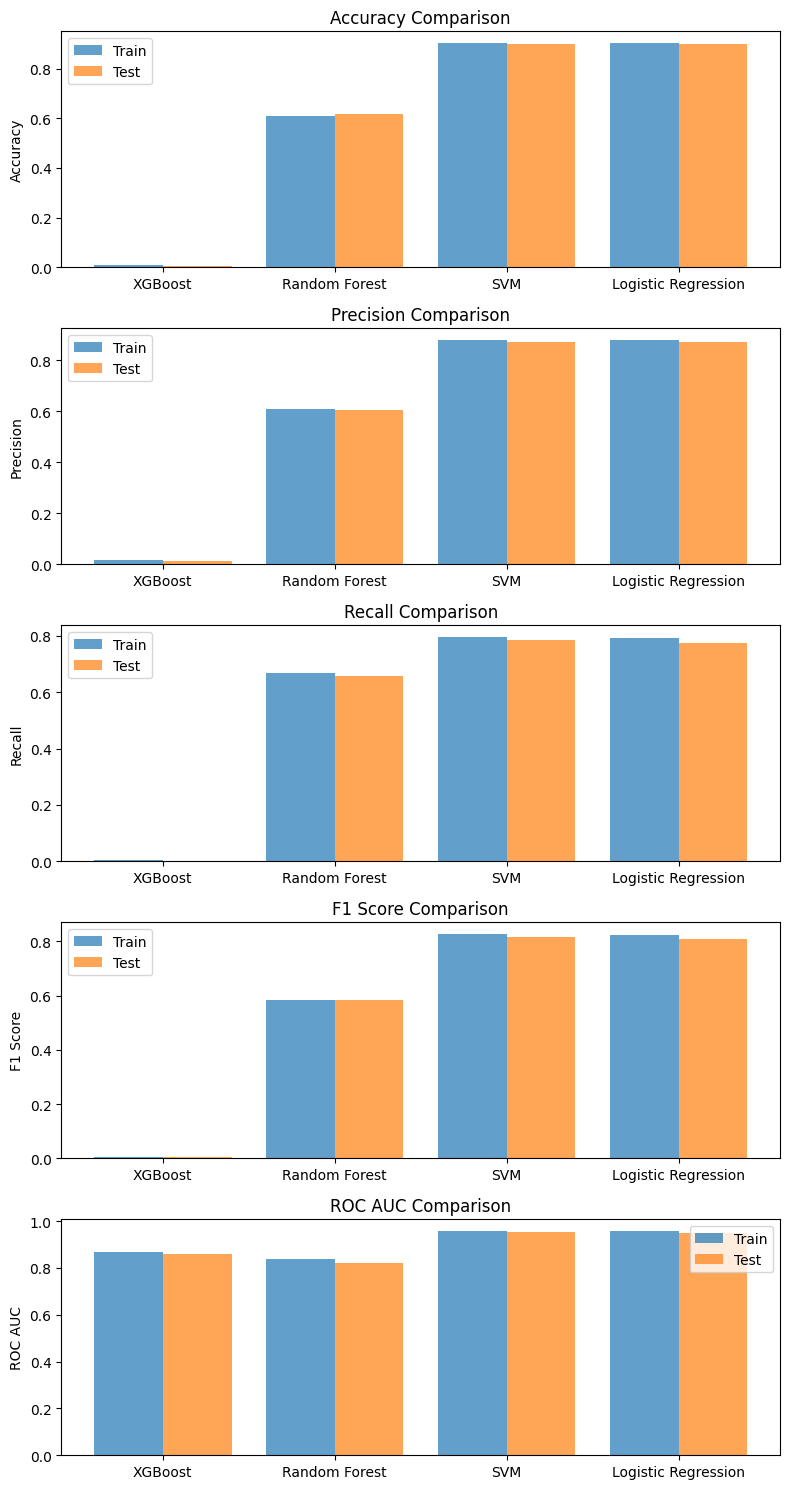

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model_names = ['XGBoost', 'Random Forest', 'SVM', 'Logistic Regression']

train_metrics = [train_accuracy, train_precision, train_recall, train_f1_score, train_roc_auc]
test_metrics = [test_accuracy, test_precision, test_recall, test_f1_score, test_roc_auc]

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(8, 15))

for i, metric in enumerate(metrics):
    ax = axes[i]
    ax.bar(np.arange(len(model_names)) - 0.2, train_metrics[i], width=0.4, label='Train', align='center', alpha=0.7)
    ax.bar(np.arange(len(model_names)) + 0.2, test_metrics[i], width=0.4, label='Test', align='center', alpha=0.7)
    ax.set_xticks(np.arange(len(model_names)))
    ax.set_xticklabels(model_names)
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} Comparison')
    ax.legend()

plt.tight_layout()
plt.show()

 Logistic Regression is the best model then SVC then XGB then RF by comparing them with Accuracy and precision

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

## Logistic Regression Over/ Under Sampling

In [ ]:
!pip install imblearn

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as impip

In [ ]:
under = RandomUnderSampler(sampling_strategy = "not majority", random_state = 101)
over = SMOTE(sampling_strategy = "minority",random_state = 101)

In [ ]:
steps_os = [('transformer', column_trans), ('under', under) , ("o", over),('scaler', MinMaxScaler()),
            ('logistic', LogisticRegression())]
pipe_os_lr = impip(steps=steps_os)
pipe_os_lr.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('under',
                 RandomUnderSampler(random_state=101,
                                    sampling_strategy='not majority')),
                ('o', SMOTE(random_state=101, sampling_strategy='minority')),
                ('scaler', MinMaxScaler()),
                ('logistic', LogisticRegression())])

In [ ]:
eval_metric(pipe_os_lr, X_train, y_train, X_test, y_test)

Train_Set
[[2909   62   63]
 [  48  980   10]
 [ 223   44  276]]
              precision    recall  f1-score   support

           1       0.91      0.96      0.94      3034
           2       0.90      0.94      0.92      1038
           3       0.79      0.51      0.62       543

    accuracy                           0.90      4615
   macro avg       0.87      0.80      0.83      4615
weighted avg       0.90      0.90      0.90      4615

Test_Set
[[728  14  16]
 [ 16 240   4]
 [ 56  15  65]]
              precision    recall  f1-score   support

           1       0.91      0.96      0.93       758
           2       0.89      0.92      0.91       260
           3       0.76      0.48      0.59       136

    accuracy                           0.90      1154
   macro avg       0.86      0.79      0.81      1154
weighted avg       0.89      0.90      0.89      1154




In [ ]:
penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5, 16, 19, 22, 25]
weight = ['balanced', None]
param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C,
             "logistic__class_weight": weight}
grid_model = GridSearchCV(pipe_os_lr, param_grid = param_grid, cv=5, return_train_score=True,
                          scoring=make_scorer(f1_score, average = None,labels =[3]))
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('under',
                                        RandomUnderSampler(random_state=101,
                                                           sampling_strategy='not '
                                                                             'majority')),
                                       ('o',
                                        SMOTE(random_state=101,
                                              sampling_strategy='minority')),
                                       ('scaler', MinMaxScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': [0.01, 0.1, 1, 5, 16, 19, 22, 25],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2']},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=[3]))

In [ ]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Train_Set
[[2907   51   76]
 [  50  973   15]
 [ 200   38  305]]
              precision    recall  f1-score   support

           1       0.92      0.96      0.94      3034
           2       0.92      0.94      0.93      1038
           3       0.77      0.56      0.65       543

    accuracy                           0.91      4615
   macro avg       0.87      0.82      0.84      4615
weighted avg       0.90      0.91      0.90      4615

Test_Set
[[726  12  20]
 [ 18 237   5]
 [ 54  15  67]]
              precision    recall  f1-score   support

           1       0.91      0.96      0.93       758
           2       0.90      0.91      0.90       260
           3       0.73      0.49      0.59       136

    accuracy                           0.89      1154
   macro avg       0.85      0.79      0.81      1154
weighted avg       0.89      0.89      0.89      1154




##Under sampling

In [ ]:
under = RandomUnderSampler(sampling_strategy = "not majority", random_state = 101)

In [ ]:
steps_os = [('transformer', column_trans), ('under', under) ,('scaler', MinMaxScaler()),
            ('logistic', LogisticRegression())]
pipe_os_lr = impip(steps=steps_os)
pipe_os_lr.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('under',
                 RandomUnderSampler(random_state=101,
                                    sampling_strategy='not majority')),
                ('scaler', MinMaxScaler()),
                ('logistic', LogisticRegression())])

In [ ]:
eval_metric(pipe_os_lr, X_train, y_train, X_test, y_test)

Train_Set
[[2960   10   64]
 [ 109  898   31]
 [ 233   23  287]]
              precision    recall  f1-score   support

           1       0.90      0.98      0.93      3034
           2       0.96      0.87      0.91      1038
           3       0.75      0.53      0.62       543

    accuracy                           0.90      4615
   macro avg       0.87      0.79      0.82      4615
weighted avg       0.89      0.90      0.89      4615

Test_Set
[[740   2  16]
 [ 29 222   9]
 [ 62   7  67]]
              precision    recall  f1-score   support

           1       0.89      0.98      0.93       758
           2       0.96      0.85      0.90       260
           3       0.73      0.49      0.59       136

    accuracy                           0.89      1154
   macro avg       0.86      0.77      0.81      1154
weighted avg       0.89      0.89      0.88      1154




In [ ]:
penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5, 16, 19, 22, 25]
weight = ['balanced', None]
param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C,
             "logistic__class_weight": weight}
grid_model = GridSearchCV(pipe_os_lr, param_grid = param_grid, cv=5, return_train_score=True,
                          scoring=make_scorer(f1_score, average = None,labels =[3]))
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('under',
                                        RandomUnderSampler(random_state=101,
                                                           sampling_strategy='not '
                                                                             'majority')),
                                       ('scaler', MinMaxScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': [0.01, 0.1, 1, 5, 16, 19, 22, 25],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2']},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=[3]))

In [ ]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Train_Set
[[2939   16   79]
 [  78  930   30]
 [ 206   22  315]]
              precision    recall  f1-score   support

           1       0.91      0.97      0.94      3034
           2       0.96      0.90      0.93      1038
           3       0.74      0.58      0.65       543

    accuracy                           0.91      4615
   macro avg       0.87      0.81      0.84      4615
weighted avg       0.90      0.91      0.90      4615

Test_Set
[[732   4  22]
 [ 24 228   8]
 [ 55   7  74]]
              precision    recall  f1-score   support

           1       0.90      0.97      0.93       758
           2       0.95      0.88      0.91       260
           3       0.71      0.54      0.62       136

    accuracy                           0.90      1154
   macro avg       0.86      0.80      0.82      1154
weighted avg       0.89      0.90      0.89      1154




##Over Sampling

In [ ]:
over = SMOTE(sampling_strategy = "minority",random_state = 101)

In [ ]:
steps_os = [('transformer', column_trans), ('over', over) ,('scaler', MinMaxScaler()),
            ('logistic', LogisticRegression())]
pipe_os_r = impip(steps=steps_os)
pipe_os_r.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('over', SMOTE(random_state=101, sampling_strategy='minority')),
                ('scaler', MinMaxScaler()),
                ('logistic', LogisticRegression())])

In [ ]:
eval_metric(pipe_os_r, X_train, y_train, X_test, y_test)

Train_Set
[[2644   29  361]
 [  64  895   79]
 [  91   13  439]]
              precision    recall  f1-score   support

           1       0.94      0.87      0.91      3034
           2       0.96      0.86      0.91      1038
           3       0.50      0.81      0.62       543

    accuracy                           0.86      4615
   macro avg       0.80      0.85      0.81      4615
weighted avg       0.89      0.86      0.87      4615

Test_Set
[[668   5  85]
 [ 21 221  18]
 [ 30   4 102]]
              precision    recall  f1-score   support

           1       0.93      0.88      0.90       758
           2       0.96      0.85      0.90       260
           3       0.50      0.75      0.60       136

    accuracy                           0.86      1154
   macro avg       0.80      0.83      0.80      1154
weighted avg       0.89      0.86      0.87      1154




In [ ]:
penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5, 16, 19, 22, 25]
weight = ['balanced', None]
param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C,
             "logistic__class_weight": weight}
grid_model = GridSearchCV(pipe_os_r, param_grid = param_grid, cv=5, return_train_score=True,
                          scoring=make_scorer(f1_score, average = None,labels =[3]))
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('over',
                                        SMOTE(random_state=101,
                                              sampling_strategy='minority')),
                                       ('scaler', MinMaxScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': [0.01, 0.1, 1, 5, 16, 19, 22, 25],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2']},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=[3]))

In [ ]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Train_Set
[[2603   70  361]
 [  27  979   32]
 [  88   27  428]]
              precision    recall  f1-score   support

           1       0.96      0.86      0.91      3034
           2       0.91      0.94      0.93      1038
           3       0.52      0.79      0.63       543

    accuracy                           0.87      4615
   macro avg       0.80      0.86      0.82      4615
weighted avg       0.90      0.87      0.88      4615

Test_Set
[[659  18  81]
 [ 13 240   7]
 [ 29  10  97]]
              precision    recall  f1-score   support

           1       0.94      0.87      0.90       758
           2       0.90      0.92      0.91       260
           3       0.52      0.71      0.60       136

    accuracy                           0.86      1154
   macro avg       0.79      0.84      0.81      1154
weighted avg       0.88      0.86      0.87      1154




## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef
#matthews_corrcoef?
y_pred = model.predict(X_test)
matthews_corrcoef(y_test, y_pred)

0.7912190817696733

In [ ]:
from sklearn.metrics import cohen_kappa_score
#cohen_kappa_score?
cohen_kappa_score(y_test, y_pred)

0.7845781958431812

# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [ ]:
column_trans_final = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler(),
)

operations_final = [
    ("OneHotEncoder", column_trans_final),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

final_model = Pipeline(steps=operations_final)

In [ ]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [ ]:
X[X.Gender == "Female"].describe()

abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference   chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion   earbreadth    earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal   footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference   handlength  headbreadth  headcircumference   headlength  heelanklecircumference  heelbreadth   hipbreadth  hipbreadthsitting  iliocristaleheight  \
count                     1870.000000     1870.000000            1870.000000         1870.000000   1870.000000              1870.000000       1870.000000        1870.000000                1870.000000       1870.000000       1870.000000         1870.000000       1870.000000                1870.000000         1870.000000           1870.000000   1870.000000    1870.000000        1870.000000             1870.000000        1870.000000      1870.000000   1870.000000         1870.000000  1870.000000  1870.000000   1870.000000            1870.000000                     1870.000000  1870.000000  1870.000000    1870.000000      1870.000000       1870.000000            1870.000000  1870.000000                1870.000000                 1870.000000            1870.000000        1870.000000          1870.000000  1870.000000        1870.000000  1870.000000  1870.000000        1870.000000  1870.000000             1870.000000  1870.000000  1870.000000        1870.000000         1870.000000   
mean                       230.167914     1337.080214             311.917112          216.050267   1241.028342               228.232620        182.378075         365.723529                 306.391444        273.383957        450.853476           67.104813        311.005882                 287.827807          133.471123           1023.655080    233.627273     835.859358         592.170053              486.511230         373.577005      1397.656150    269.566845          948.540642   248.011765  1173.495187    784.296257             621.756684                      342.550802    33.257754    59.343316      20.387166       231.649733        747.855615              92.704278   246.703743                 318.369519                  264.664706             495.543316         440.730481          1046.428342    78.255615         186.794118   181.371123   147.581818         561.492513   190.135829              310.908556    67.226203   354.506417         399.906952          997.824064   
std                         31.575207       56.867243              16.755539           14.811447     54.736303                11.719474          9.464408          18.224303                  30.506702         22.345652         28.468449            3.473161         14.204479                  15.299237            5.399401             75.154759     24.221017      44.530714          31.720269               27.995923          28.387184        58.389276     18.562825           82.398867    27.153092    54.458379     43.663837              42.195349                       28.476781     2.767595     3.867909       2.651477        26.203178         30.334456               4.768222    12.228821                  17.871093                   18.263905              40.848675          23.109785            52.746504     3.811350           8.734774     9.970004     5.121999          19.448927     7.289162               15.071461     5.182559    26.526620          32.451139           48.453478   
min                        155.000000  

In [ ]:
female_mean_human = X[X.Gender == "Female"].describe(include="all").loc["mean"]
female_mean_human

abdominalextensiondepthsitting     230.167914
acromialheight                    1337.080214
acromionradialelength              311.917112
anklecircumference                 216.050267
axillaheight                      1241.028342
balloffootcircumference             228.23262
balloffootlength                   182.378075
biacromialbreadth                  365.723529
bicepscircumferenceflexed          306.391444
bicristalbreadth                   273.383957
bideltoidbreadth                   450.853476
bimalleolarbreadth                  67.104813
bitragionchinarc                   311.005882
bitragionsubmandibulararc          287.827807
bizygomaticbreadth                 133.471123
buttockcircumference               1023.65508
buttockdepth                       233.627273
buttockheight                      835.859358
buttockkneelength                  592.170053
buttockpopliteallength              486.51123
calfcircumference                  373.577005
cervicaleheight                   

In [ ]:
female_mean_human["Gender"] = "Male"
female_mean_human["SubjectsBirthLocation"] = "Texas"
female_mean_human["WritingPreference"] = "Left hand"

In [ ]:
pd.DataFrame(female_mean_human).T

abdominalextensiondepthsitting acromialheight acromionradialelength anklecircumference axillaheight balloffootcircumference balloffootlength biacromialbreadth bicepscircumferenceflexed bicristalbreadth bideltoidbreadth bimalleolarbreadth bitragionchinarc bitragionsubmandibulararc bizygomaticbreadth buttockcircumference buttockdepth buttockheight buttockkneelength buttockpopliteallength calfcircumference cervicaleheight chestbreadth chestcircumference  chestdepth  chestheight crotchheight crotchlengthomphalion crotchlengthposterioromphalion earbreadth  earlength earprotrusion elbowrestheight eyeheightsitting footbreadthhorizontal  footlength forearmcenterofgriplength forearmcircumferenceflexed forearmforearmbreadth forearmhandlength functionalleglength handbreadth handcircumference  handlength headbreadth headcircumference  headlength heelanklecircumference heelbreadth  hipbreadth hipbreadthsitting iliocristaleheight interpupillarybreadth  interscyei interscyeii  \
mean                     230.167914    1337.080214            311.917112         216.050267  1241.028342               228.23262       182.378075        365.723529                306.391444       273.383957       450.853476          67.104813       311.005882                287.827807         133.471123           1023.65508   233.627273    835.859358        592.170053              486.51123        373.577005      1397.65615   269.566845         948.540642  248.011765  1173.495187   784.296257            621.756684                     342.550802  33.257754  59.343316     20.387166      231.649733       747.855615             92.704278  246.703743                318.369519                 264.664706            495.543316        440.730481         1046.428342   78.255615        186.794118  181.371123  147.581818        561.492513  190.135829             310.908556   67.226203  354.506417        399.906952         997.824064            617.077005  373.950802  396.297326   

     kneeheightmidpatella kneeheightsitting lateralfemoralepicondyleheight lateralmalleolusheight lowerthighcircumference mentonsellionlength neckcircumference neckcircumferencebase overheadfingertipreachsitting  palmlength poplitealheight radialestylionlength shouldercircumference shoulderelbowlength shoulderlength sittingheight sleevelengthspinewrist sleeveoutseam         span      stature suprasternaleheight tenthribheight thighcircumference thighclearance thumbtipreach tibialheight tragiontopofhead trochanterionheight verticaltrunkcircumferenceusa waistbacklength waistbreadth waistcircumference  waistdepth waistfrontlengthsitting waistheightomphalion    weightkg wristcircumference wristheight Gender Component Branch SubjectsBirthLocation        Age WritingPreference  
mean           450.182888        512.502674                     466.992513              62.881818               401.25615          113.173797         330.12246            371.592513                    1311.41016  108.886631       389.16738           241.917647           1029.698396          334.995722     135.548663    856.712299             808.274332    544.663102  1663.371658  1630.521925         1331.775936    1058.235829         617.846524     168.266845     745.08877   438.885561       126.377005          847.280214                   1560.928877      425.487166   300.268449         862.134759  213.567914              355.114439           982.197861  680.605882         155.004278  794.997326   Male       NaN    NaN                 Texas  28.950802         Left hand

In [ ]:
final_model.predict(pd.DataFrame(female_mean_human).T)

array([3])

In [ ]:
y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.751243624251778

In [ ]:
cohen_kappa_score(y_test, y_pred)

0.7427331538776822

##SHAP

In [156]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 6.4 MB/s eta 0:00:00


In [223]:
column_trans_shap = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False,
)

X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

model_shap = LogisticRegression(
    class_weight=None,
    penalty="l1",
    solver="liblinear",
)

model_shap.fit(X_train_trans, y_train)


LogisticRegression(penalty='l1', solver='liblinear')

In [224]:
eval_metric(model_shap, X_train_trans, y_train, X_test_trans, y_test)

Train_Set
[[2951   32   51]
 [  70  957   11]
 [ 243   40  260]]
              precision    recall  f1-score   support

           1       0.90      0.97      0.94      3034
           2       0.93      0.92      0.93      1038
           3       0.81      0.48      0.60       543

    accuracy                           0.90      4615
   macro avg       0.88      0.79      0.82      4615
weighted avg       0.90      0.90      0.90      4615

Test_Set
[[739   6  13]
 [ 21 237   2]
 [ 61  16  59]]
              precision    recall  f1-score   support

           1       0.90      0.97      0.94       758
           2       0.92      0.91      0.91       260
           3       0.80      0.43      0.56       136

    accuracy                           0.90      1154
   macro avg       0.87      0.77      0.80      1154
weighted avg       0.89      0.90      0.89      1154




In [225]:
operations = [
    ("OneHotEncoder", column_trans_shap),
    (
        "log",
        LogisticRegression(
            class_weight=None,
            penalty="l1",
            solver="liblinear",
        ),
    ),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=['accuracy', 'precision_weighted','recall_weighted','f1_weighted'], cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_accuracy               0.889274
train_accuracy              0.902546
test_precision_weighted     0.883041
train_precision_weighted    0.897863
test_recall_weighted        0.889274
train_recall_weighted       0.902546
test_f1_weighted            0.879627
train_f1_weighted           0.894077
dtype: float64

In [226]:
features = column_trans_shap.get_feature_names_out()
features

array(['Gender_Female', 'Gender_Male', 'Component_Army National Guard',
       'Component_Army Reserve', 'Component_Regular Army',
       'Branch_Combat Arms', 'Branch_Combat Service Support',
       'Branch_Combat Support', 'SubjectsBirthLocation_Alabama',
       'SubjectsBirthLocation_Arizona', 'SubjectsBirthLocation_Arkansas',
       'SubjectsBirthLocation_California',
       'SubjectsBirthLocation_Colorado', 'SubjectsBirthLocation_Florida',
       'SubjectsBirthLocation_Georgia', 'SubjectsBirthLocation_Germany',
       'SubjectsBirthLocation_Illinois', 'SubjectsBirthLocation_Indiana',
       'SubjectsBirthLocation_Iowa', 'SubjectsBirthLocation_Kansas',
       'SubjectsBirthLocation_Kentucky',
       'SubjectsBirthLocation_Louisiana',
       'SubjectsBirthLocation_Maryland',
       'SubjectsBirthLocation_Massachusetts',
       'SubjectsBirthLocation_Michigan',
       'SubjectsBirthLocation_Minnesota',
       'SubjectsBirthLocation_Mississippi',
       'SubjectsBirthLocation_Missouri

##Shap values for test data

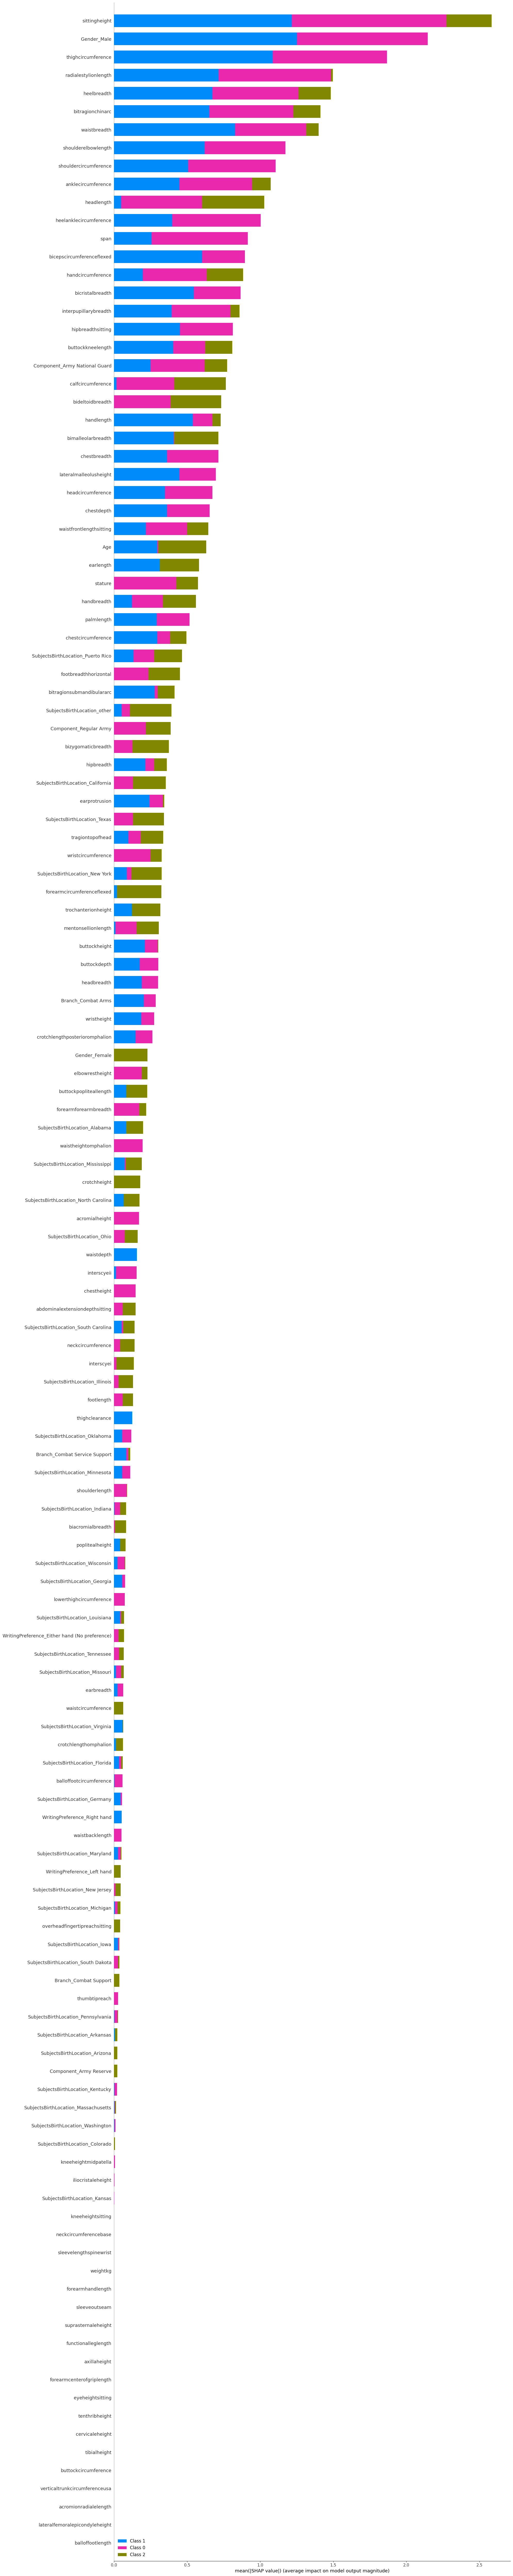

In [227]:
import shap

explainer = shap.LinearExplainer(model_shap, X_train_trans)  # LinearExplainer

shap_values = explainer.shap_values(X_test_trans)

shap.summary_plot(
    shap_values, max_display=300, feature_names=features, plot_size=(20, 100)
)

##SHAP values for Feature Selection (train data)

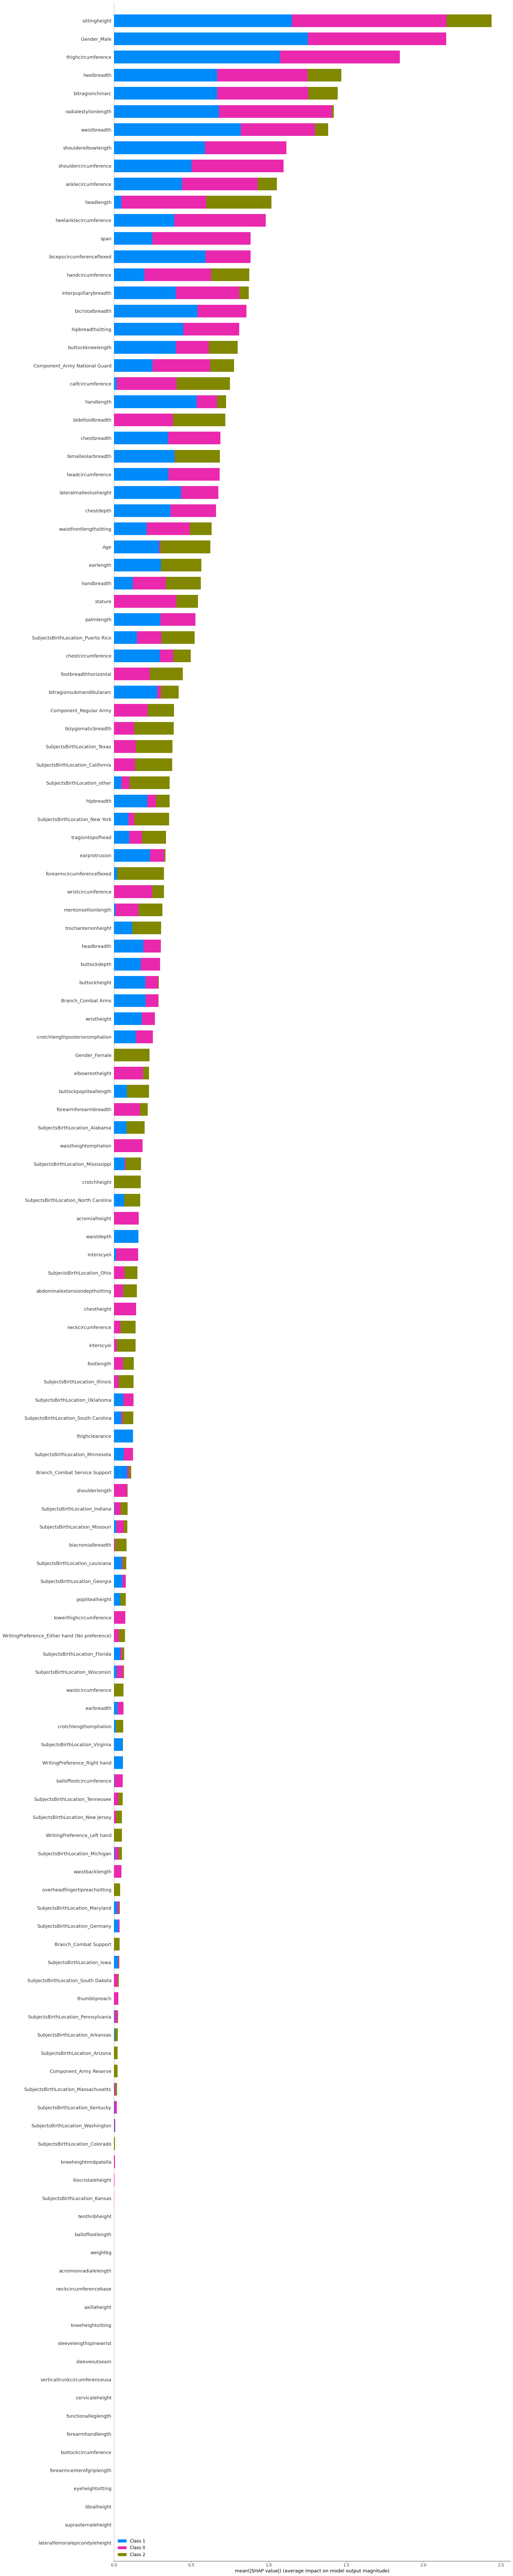

In [228]:
explainer = shap.Explainer(model_shap, X_train_trans)

shap_values = explainer.shap_values(X_train_trans)

shap.summary_plot(
    shap_values, max_display=300, feature_names=features, plot_size=(20, 100)
)


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___